In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import datasets 
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_roc_curve, f1_score, precision_score, recall_score, accuracy_score, classification_report
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, chi2
from math import pi
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

Load Data and One Hot Encoding

In [2]:
f=pd.read_csv('data.csv')
X =f.iloc[:,:13].values
Y = f.iloc[:,14]

print(X,Y)

[[  0. 104.   8. ...  12.   3.   1.]
 [  1. 101.   8. ...  12.   3.   1.]
 [  2. 137.   8. ...  12.   3.   1.]
 ...
 [860.   3.   1. ...  12.   3.   1.]
 [861.  24.   9. ...  12.   3.   1.]
 [862.  15.  27. ...  12.   3.   1.]] 0      1
1      0
2      0
3      0
4      0
      ..
858    1
859    0
860    0
861    0
862    0
Name: result, Length: 863, dtype: int64


In [3]:
one_hot_encoded_data = pd.get_dummies(f, columns = ['symptom1', 'diff_sym_hos'])
print(one_hot_encoded_data)

     Unnamed: 0  location  country  gender   age  vis_wuhan  from_wuhan  \
0             0       104        8       1  66.0          1           0   
1             1       101        8       0  56.0          0           1   
2             2       137        8       1  46.0          0           1   
3             3       116        8       0  60.0          1           0   
4             4       116        8       1  58.0          0           0   
..          ...       ...      ...     ...   ...        ...         ...   
858         858        48        3       2  24.0          0           0   
859         859         0        0       2  35.0          0           0   
860         860         3        1       1  49.4          0           0   
861         861        24        9       1  49.4          0           0   
862         862        15       27       1  70.0          0           0   

     symptom2  symptom3  symptom4  ...  diff_sym_hos_6  diff_sym_hos_7  \
0          31        19  

In [4]:
#splliting data into train, test and validate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_both = train_test_split(X, Y, test_size = 0.3,stratify= Y, random_state=3)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_both, test_size = 0.5, random_state=3)

SVM Classifier

In [5]:
from sklearn.svm import SVC
svc =SVC()
svc.fit(X,Y)

SVC()

In [6]:
svc.fit(X_train,y_train)
svc.fit(X_valid,y_valid)

SVC()

In [7]:
#accuracy testing and validating
y_pred_svm = svc.predict(X_test)

valpred = svc.predict(X_valid)

print ('Accuracy of testing = ',metrics.accuracy_score(y_test,y_pred_svm))
print ('Accuracy of validating = ',metrics.accuracy_score(y_valid,valpred))

Accuracy of testing =  0.9147286821705426
Accuracy of validating =  0.8384615384615385


In [8]:
C = 1.0  

svc = svm.SVC(kernel='linear', C=C).fit(X, Y)

rbf_svc = svm.SVC(kernel='rbf', C=C).fit(X, Y)

poly_svc = svm.SVC(kernel='poly', C=C).fit(X, Y)

lin_svc = svm.LinearSVC(C=C).fit(X, Y)

In [9]:
#testing
print('Accuracy SVM testing= ',accuracy_score(y_test,y_pred_svm))
print('F1_score SVM testing= ',f1_score(y_test,y_pred_svm,average=('weighted')))
print('Recall SVM testing= ',recall_score(y_test,y_pred_svm,average=('weighted')))
print('precision SVM testing= ',precision_score(y_test,y_pred_svm,average=('weighted')))

#validating
print('\n\nAccuracy SVM validating= ',accuracy_score(y_valid,valpred))
print('F1_score SVM validating= ',f1_score(y_valid,valpred,average=('weighted')))
print('Recall SVM validating= ',recall_score(y_valid,valpred,average=('weighted')))
print('precision SV validating= ',precision_score(y_valid,valpred,average=('weighted')))

Accuracy SVM testing=  0.9147286821705426
F1_score SVM testing=  0.8739917772965509
Recall SVM testing=  0.9147286821705426
precision SVM testing=  0.8367285619854576


Accuracy SVM validating=  0.8384615384615385
F1_score SVM validating=  0.7647891857096878
Recall SVM validating=  0.8384615384615385
precision SV validating=  0.70301775147929


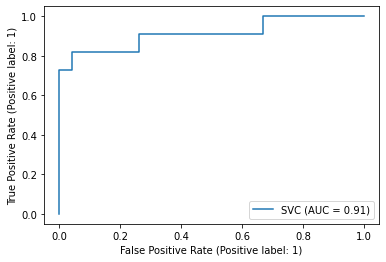

In [10]:
metrics.plot_roc_curve(svc,X_test,y_test)

KNN Classifier

In [11]:
# lets start by sitting the k with 5
knn = KNeighborsClassifier(n_neighbors =5)
knn.fit(X_train, y_train)
pred = knn.predict(X_valid)
print(confusion_matrix(y_valid,pred))
print(classification_report(y_valid, pred))

[[109   0]
 [ 12   9]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       109
           1       1.00      0.43      0.60        21

    accuracy                           0.91       130
   macro avg       0.95      0.71      0.77       130
weighted avg       0.92      0.91      0.89       130



In [12]:
#now lets find a good value of k 
#we are going to check the error rate for k=1 to k=60.
#For every value of k we are going to call the KNN classifier and then choose the value of k which has the least error rate.

error_rate = []

for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_valid)
    error_rate.append(np.mean(pred_i != y_valid))

Text(0, 0.5, 'Error Rate')

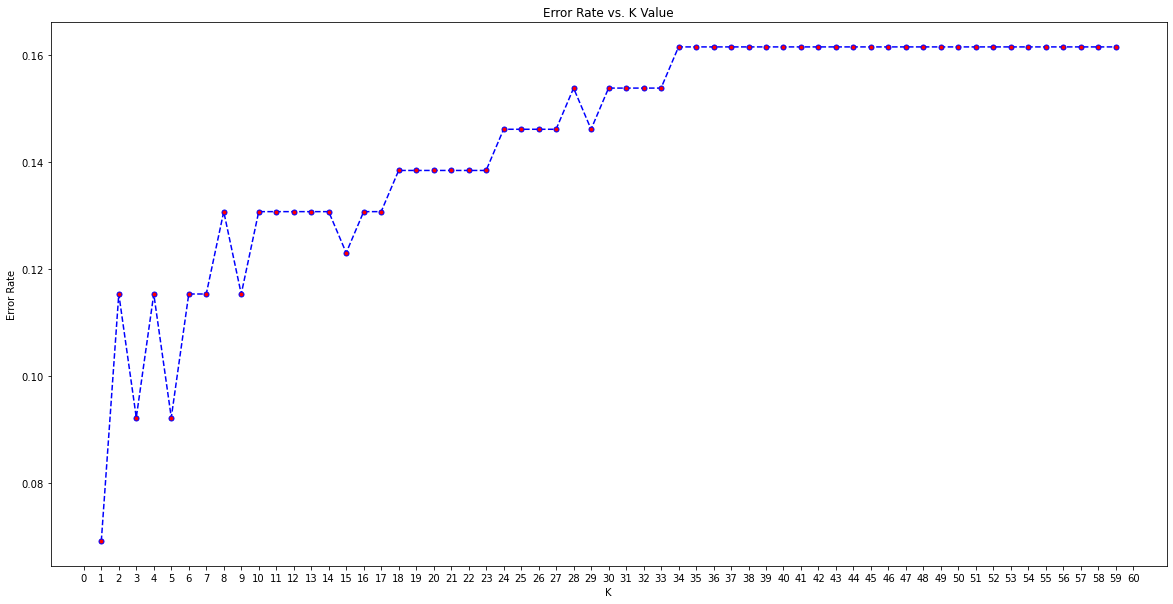

In [13]:
#to plot error rate
plt.figure(figsize=(20,10))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
listOf_Xticks = np.arange(0, 61, 1)
plt.xticks(listOf_Xticks)
plt.ylabel('Error Rate')

In [14]:
#from the graph we can see that that at k=1 we have the least error rate
#so now lets set k with 1
knn = KNeighborsClassifier(n_neighbors =1)
knn.fit(X_train, y_train)
valpred = knn.predict(X_valid)
print(confusion_matrix(y_valid,valpred))
print(classification_report(y_valid, valpred))

[[105   4]
 [  5  16]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       109
           1       0.80      0.76      0.78        21

    accuracy                           0.93       130
   macro avg       0.88      0.86      0.87       130
weighted avg       0.93      0.93      0.93       130



In [15]:
#as we can see the accuracy increased 

In [16]:
#now the testing
y_pred_knn = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


[[112   6]
 [  1  10]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       118
           1       0.62      0.91      0.74        11

    accuracy                           0.95       129
   macro avg       0.81      0.93      0.86       129
weighted avg       0.96      0.95      0.95       129



In [17]:
#testing
print('Accuracy KNN testing= ',accuracy_score(y_test,y_pred_knn))
print('F1_score KNN testing= ',f1_score(y_test,y_pred_knn,average=('weighted')))
print('Recall KNN testing= ',recall_score(y_test,y_pred_knn,average=('weighted')))
print('precision KNN testing= ',precision_score(y_test,y_pred_knn,average=('weighted')))

#validating
print('\n\nAccuracy KNN validating= ',accuracy_score(y_valid,valpred))
print('F1_score KNN validating= ',f1_score(y_valid,valpred,average=('weighted')))
print('Recall KNN validating= ',recall_score(y_valid,valpred,average=('weighted')))
print('precision KNN validating= ',precision_score(y_valid,valpred,average=('weighted')))

Accuracy KNN testing=  0.9457364341085271
F1_score KNN testing=  0.9501735703286092
Recall KNN testing=  0.9457364341085271
precision KNN testing=  0.9599283117239488


Accuracy KNN validating=  0.9307692307692308
F1_score KNN validating=  0.93008301421265
Recall KNN validating=  0.9307692307692308
precision KNN validating=  0.9295804195804196


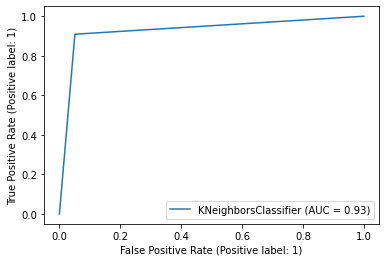

In [18]:
metrics.plot_roc_curve(knn, X_test, y_test)

Decision Tree Classifier

In [19]:
dectree = DecisionTreeClassifier(random_state=42,max_depth=3,min_samples_leaf=5)   
dectree.fit(X_train,y_train)
#now lets test the accuracy
pred = dectree.predict(X_valid)
print(confusion_matrix(y_valid, pred))
print(classification_report(y_valid, pred))

[[104   5]
 [  3  18]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       109
           1       0.78      0.86      0.82        21

    accuracy                           0.94       130
   macro avg       0.88      0.91      0.89       130
weighted avg       0.94      0.94      0.94       130



In [20]:
#let us tune our hyperparameters
dtreeparam_grid = {
    'max_depth': np.arange(1,15),
    'max_features': np.arange(1,15),
    'random_state': [3]
}
dtree_search = GridSearchCV(dectree, param_grid = dtreeparam_grid, refit = True, verbose = 1, cv=7)
dtree_search.fit(X_train , y_train)

paralist = []
paralist = list(dtree_search.best_params_.values())

dectree = DecisionTreeClassifier(criterion = "entropy", max_depth= paralist[0], max_features =paralist[1], random_state=3)
dectree.fit(X_train, y_train)

Fitting 7 folds for each of 196 candidates, totalling 1372 fits


DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features=5,
                       random_state=3)

In [21]:
valpred = dectree.predict(X_valid)
print(confusion_matrix(y_valid, valpred))
print(classification_report(y_valid, valpred))

[[106   3]
 [  6  15]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       109
           1       0.83      0.71      0.77        21

    accuracy                           0.93       130
   macro avg       0.89      0.84      0.86       130
weighted avg       0.93      0.93      0.93       130



In [22]:
#testing decision tree
y_pred_DT = dectree.predict(X_test)
print(confusion_matrix(y_test, y_pred_DT))
print(classification_report(y_test, y_pred_DT))

[[114   4]
 [  3   8]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       118
           1       0.67      0.73      0.70        11

    accuracy                           0.95       129
   macro avg       0.82      0.85      0.83       129
weighted avg       0.95      0.95      0.95       129



In [23]:
#testing
print('Accuracy Dtree testing= ',accuracy_score(y_test,y_pred_DT))
print('F1_score Dtree testing= ',f1_score(y_test,y_pred_DT,average=('weighted')))
print('Recall Dtree testing= ',recall_score(y_test,y_pred_DT,average=('weighted')))
print('precision Dtree testing= ',precision_score(y_test,y_pred_DT,average=('weighted')))

#validating
print('\n\nAccuracy Dtree validating= ',accuracy_score(y_valid,valpred))
print('F1_score Dtree validating= ',f1_score(y_valid,valpred,average=('weighted')))
print('Recall Dtree validating= ',recall_score(y_valid,valpred,average=('weighted')))
print('precision Dtree validating= ',precision_score(y_valid,valpred,average=('weighted')))

Accuracy Dtree testing=  0.9457364341085271
F1_score Dtree testing=  0.9468006224497845
Recall Dtree testing=  0.9457364341085271
precision Dtree testing=  0.9481216457960644


Accuracy Dtree validating=  0.9307692307692308
F1_score Dtree validating=  0.9285764009745909
Recall Dtree validating=  0.9307692307692308
precision Dtree validating=  0.9281593406593406


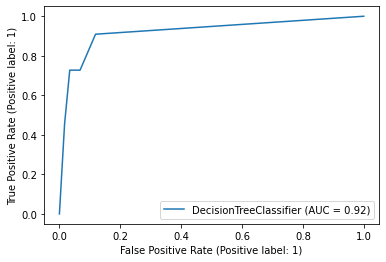

In [24]:
metrics.plot_roc_curve(dectree, X_test, y_test)

Logistic Regression Classifier

Validate before tuning 


In [25]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)

LogisticRegression()

In [26]:
y_pred = lr.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

[[107   2]
 [  6  15]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       109
           1       0.88      0.71      0.79        21

    accuracy                           0.94       130
   macro avg       0.91      0.85      0.88       130
weighted avg       0.94      0.94      0.94       130



In [27]:
f1_score(y_valid, y_pred, average='weighted') 

0.935777072619178

In [28]:
#LR = LogisticRegression()
#Tuning the hyperparameters
LRparam_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['none','l1', 'l2'],
    'solver': ['lbfgs', 'liblinear']
}
LR_search = GridSearchCV(lr, param_grid = LRparam_grid, refit = True, verbose = 1, cv=7)

# fitting the model for grid search 
LR_search.fit(X_train , y_train)

paralist = []
paralist = list(LR_search.best_params_.values())

lr = LogisticRegression(C= paralist[0] , penalty= paralist[1], solver= paralist[2])
lr.fit(X_train, y_train)

Fitting 7 folds for each of 36 candidates, totalling 252 fits


LogisticRegression(C=0.1, solver='liblinear')

Validation after tuning


In [29]:
valpred = lr.predict(X_valid)
print(confusion_matrix(y_valid, valpred))
print(classification_report(y_valid, valpred))

[[108   1]
 [  7  14]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       109
           1       0.93      0.67      0.78        21

    accuracy                           0.94       130
   macro avg       0.94      0.83      0.87       130
weighted avg       0.94      0.94      0.93       130



In [30]:
f1_score(y_valid, y_pred, average='weighted')

0.935777072619178

Testing logistic regression algorithm 


In [31]:
y_pred_log = lr.predict(X_test)
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

[[114   4]
 [  7   4]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       118
           1       0.50      0.36      0.42        11

    accuracy                           0.91       129
   macro avg       0.72      0.66      0.69       129
weighted avg       0.90      0.91      0.91       129



In [32]:
f1_score(y_test, y_pred_log, average='weighted') 

0.9085319116610246

In [33]:
accuracy_score(y_test, y_pred_log)

0.9147286821705426

In [34]:
#testing
print('Accuracy LogReg testing= ',accuracy_score(y_test,y_pred_log))
print('F1_score LogReg testing= ',f1_score(y_test,y_pred_log,average=('weighted')))
print('Recall LogReg testing= ',recall_score(y_test,y_pred_log,average=('weighted')))
print('precision LogReg testing= ',precision_score(y_test,y_pred_log,average=('weighted')))

#validating
print('\n\nAccuracy LogReg validating= ',accuracy_score(y_valid,valpred))
print('F1_score LogReg validating= ',f1_score(y_valid,valpred,average=('weighted')))
print('Recall LogReg validating= ',recall_score(y_valid,valpred,average=('weighted')))
print('precision LogReg validating= ',precision_score(y_valid,valpred,average=('weighted')))

Accuracy LogReg testing=  0.9147286821705426
F1_score LogReg testing=  0.9085319116610246
Recall LogReg testing=  0.9147286821705426
precision LogReg testing=  0.9044461528605291


Accuracy LogReg validating=  0.9384615384615385
F1_score LogReg validating=  0.9341575091575092
Recall LogReg validating=  0.9384615384615385
precision LogReg validating=  0.9381939799331104


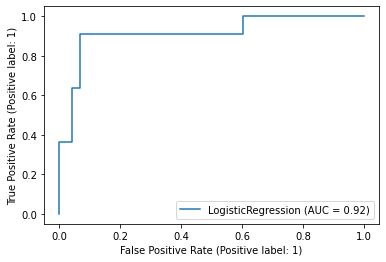

In [35]:
metrics.plot_roc_curve(lr, X_test, y_test)

Naive Bayes Classifier

Validation before tuning


In [36]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.fit(X_valid, y_valid)

GaussianNB()

In [37]:
y_pred = gnb.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

[[103   6]
 [  9  12]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       109
           1       0.67      0.57      0.62        21

    accuracy                           0.88       130
   macro avg       0.79      0.76      0.77       130
weighted avg       0.88      0.88      0.88       130



In [38]:
f1_score(y_valid, y_pred, average='weighted') 

0.8809606682909851

In [39]:
#Tuning the hyperparameters
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, param_grid = params_NB, verbose=1, scoring='accuracy') 
gs_NB.fit(X_train, y_train)

var_value = gs_NB.best_params_.get('var_smoothing')
gnb = GaussianNB(var_smoothing = var_value)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


Validation after tuning


In [40]:
gnb.fit(X_train, y_train)
valpred = gnb.predict(X_valid)
print(confusion_matrix(y_valid, valpred))
print(classification_report(y_valid, valpred))

[[109   0]
 [ 13   8]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       109
           1       1.00      0.38      0.55        21

    accuracy                           0.90       130
   macro avg       0.95      0.69      0.75       130
weighted avg       0.91      0.90      0.88       130



In [41]:
f1_score(y_valid, valpred, average='weighted') 


0.8804000597104046

Testing Naïve Bayes

In [42]:
y_pred_naive = gnb.predict(X_test)
print(confusion_matrix(y_test, y_pred_naive))
print(classification_report(y_test, y_pred_naive))

[[117   1]
 [  8   3]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       118
           1       0.75      0.27      0.40        11

    accuracy                           0.93       129
   macro avg       0.84      0.63      0.68       129
weighted avg       0.92      0.93      0.91       129



In [43]:
f1_score(y_test, y_pred_naive, average='weighted') 


0.9149583692219352

In [44]:
#testing
print('Accuracy NB testing= ',accuracy_score(y_test,y_pred_naive))
print('F1_score NB testing= ',f1_score(y_test,y_pred_naive,average=('weighted')))
print('Recall NB testing= ',recall_score(y_test,y_pred_naive,average=('weighted')))
print('precision NB testing= ',precision_score(y_test,y_pred_naive,average=('weighted')))

#validating
print('\n\nAccuracy NB validating= ',accuracy_score(y_valid,valpred))
print('F1_score NB validating= ',f1_score(y_valid,valpred,average=('weighted')))
print('Recall NB validating= ',recall_score(y_valid,valpred,average=('weighted')))
print('precision NB validating= ',precision_score(y_valid,valpred,average=('weighted')))

Accuracy NB testing=  0.9302325581395349
F1_score NB testing=  0.9149583692219352
Recall NB testing=  0.9302325581395349
precision NB testing=  0.920139534883721


Accuracy NB validating=  0.9
F1_score NB validating=  0.8804000597104046
Recall NB validating=  0.9
precision NB validating=  0.9106557377049179


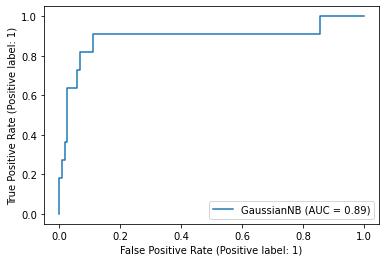

In [45]:
metrics.plot_roc_curve(gnb, X_test, y_test)

In [46]:
accuracy_score(y_test, y_pred_naive)

0.9302325581395349

schedule for all classifiers

In [47]:
def make_spider(row, title, color):

    # number of variable
    categories = list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(3, 2, row+1, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([.25, .5, 0.75, 1], ["0.25", "0.5",
               "0.75", "1"], color="grey", size=7)
    plt.ylim(0, 1)

    # Ind1
    values = df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

         group  f1_score  Precision    Recall       AUC  Accuracy
0      Log-Reg  0.908532   0.904446  0.914729  0.664869  0.914729
1  Naive Bayes  0.914958   0.920140  0.930233  0.632126  0.930233
2          KNN  0.950174   0.959928  0.945736  0.929122  0.945736
3        DTree  0.946801   0.948122  0.945736  0.846687  0.945736
4          SVM  0.873992   0.836729  0.914729  0.500000  0.914729


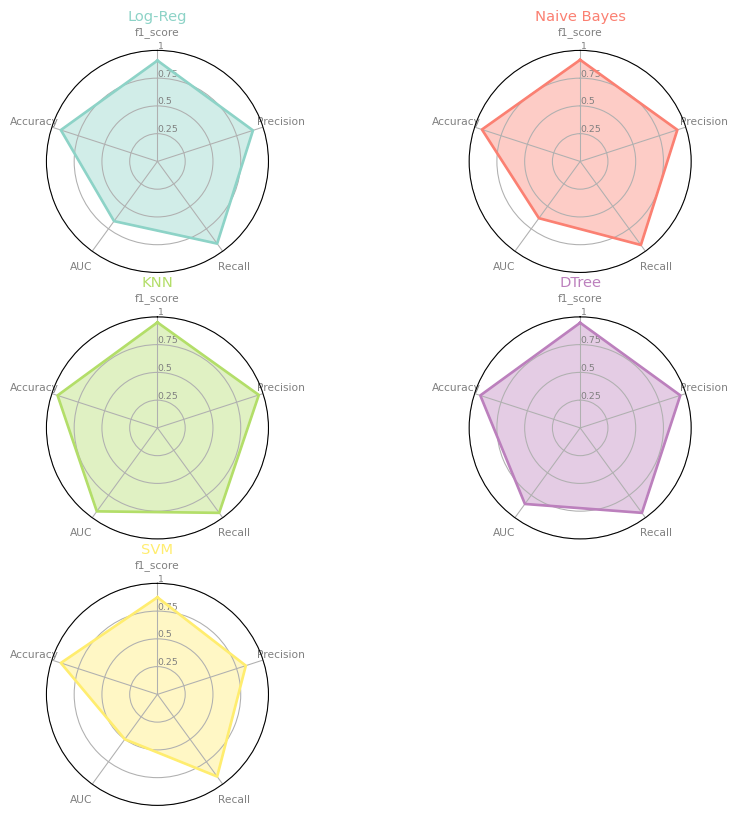

In [48]:
# Set data
df = pd.DataFrame({
    'group': ['Log-Reg', 'Naive Bayes', 'KNN', 'DTree', 'SVM'],
    'f1_score': [f1_score(y_test, y_pred_log,average=('weighted')),  f1_score(y_test, y_pred_naive,average=('weighted')), f1_score(y_test, y_pred_knn,average=('weighted')), f1_score(y_test, y_pred_DT,average=('weighted')), f1_score(y_test, y_pred_svm,average=('weighted'))],
    'Precision': [precision_score(y_test, y_pred_log,average=('weighted')),  precision_score(y_test, y_pred_naive,average=('weighted')), precision_score(y_test, y_pred_knn,average=('weighted')), precision_score(y_test, y_pred_DT,average=('weighted')), precision_score(y_test, y_pred_svm,average=('weighted'))],
    'Recall': [recall_score(y_test, y_pred_log,average=('weighted')),  recall_score(y_test, y_pred_naive,average=('weighted')),  recall_score(y_test, y_pred_knn,average=('weighted')),  recall_score(y_test, y_pred_DT,average=('weighted')),  recall_score(y_test, y_pred_svm,average=('weighted'))],
    'AUC': [roc_auc_score(y_test, y_pred_log),  roc_auc_score(y_test, y_pred_naive),  roc_auc_score(y_test, y_pred_knn), roc_auc_score(y_test, y_pred_DT), roc_auc_score(y_test, y_pred_svm)],
    'Accuracy':  [accuracy_score(y_test, y_pred_log),  accuracy_score(y_test, y_pred_naive),  accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_DT), accuracy_score(y_test, y_pred_svm)]
})



# PART 2: Apply the function to all individuals
# initialize the figure
my_dpi = 96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

# Create a color palette:
my_palette = plt.cm.get_cmap("Set3", len(df.index))

# Loop to plot
for row in range(0, len(df.index)):
    make_spider(row=row, title=df['group'][row], color=my_palette(row))
print(df)